In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [22]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [23]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

'2017-08-23'

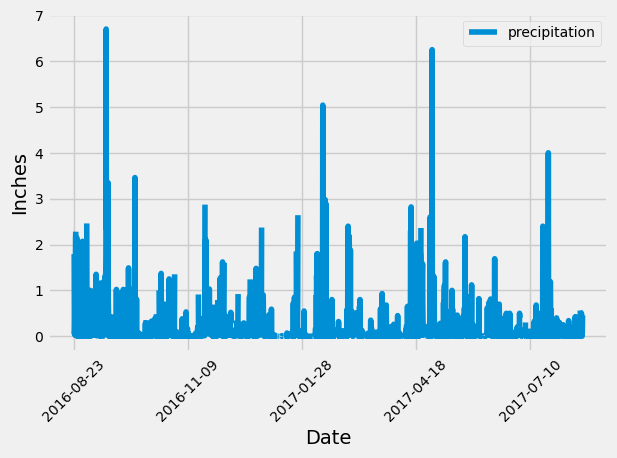

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
one_year_ago = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(one_year_prcp, columns=['date', 'precipitation'])

# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.set_index('date', inplace=True)
sorted_prcp_df.plot()
plt.legend(loc="best", fontsize=10)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Inches', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
# Use 'distinct' function to retrieve uniqe values
session.query(station.station).distinct().count()

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_active_list = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# Print out the answer of the question: which station id has the greatest number of observations?
most_active_station = station_active_list[0][0]
print(f"The most active station is {most_active_station}, which has the greatest number of observations.")

# To show the list of stations and their observation counts.
station_active_list

The most active station is USC00519281, which has the greatest number of observations.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
session.query(*sel).filter(measurement.station == most_active_station).group_by(measurement.station).all()


[(54.0, 85.0, 71.66378066378067)]

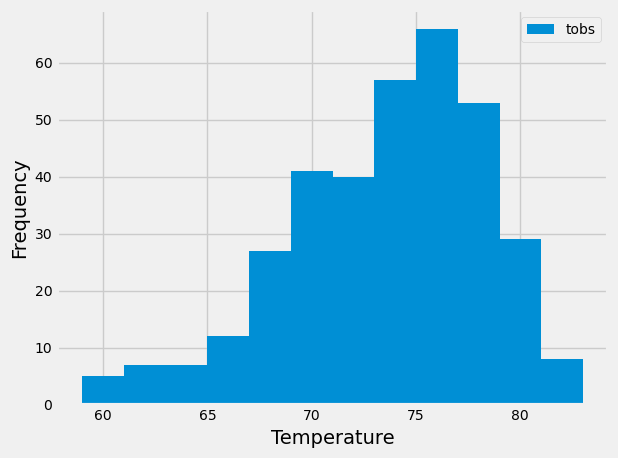

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_tobs = session.query(measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date >= one_year_ago).all()
tobs_df = pd.DataFrame(one_year_tobs, columns=['tobs'])

# Plot the results as a histogram with 'bins=12'
tobs_df.plot(kind='hist',bins=12)
plt.legend(loc="best", fontsize=10)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Close Session

In [31]:
# Close Session
session.close()